User Overview Analysis

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Retrieving Telecom Data

In [2]:
df = pd.read_excel(r'C:\Users\Niti\NEXT HIKES\PROJECT 5\telcom_data.xlsx')

In [3]:
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


Calculating number of rows and columns

In [4]:
print(f"Number of rows is {df.shape[0]}")
print(f"Number of columns is {df.shape[1]}")

Number of rows is 150001
Number of columns is 55


Handling Missing Values

In [5]:
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (s)                                         1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Dropping the columns with more than 1,00,000 missing values

In [6]:
columns_to_drop = df.columns[df.isnull().sum() > 100000]

In [7]:
df = df.drop(columns = columns_to_drop)

In [8]:
df.shape

(150001, 53)

In [9]:
df.isnull().sum()

Bearer Id                                       0
Start                                           1
Start ms                                        1
End                                             1
End ms                                          1
Dur. (s)                                        1
IMSI                                          570
MSISDN/Number                                1066
IMEI                                          572
Last Location Name                           1153
Avg RTT DL (ms)                             27829
Avg RTT UL (ms)                             27812
Avg Bearer TP DL (kbps)                         1
Avg Bearer TP UL (kbps)                         1
TCP DL Retrans. Vol (Bytes)                 88146
TCP UL Retrans. Vol (Bytes)                 96649
DL TP < 50 Kbps (%)                           754
50 Kbps < DL TP < 250 Kbps (%)                754
250 Kbps < DL TP < 1 Mbps (%)                 754
DL TP > 1 Mbps (%)                            754


Checking Datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (s)                                  150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

number of datetime columns = 2,
number of float columns = 47,
number of object columns = 4

Separating numerical and object columns

In [11]:
numerical_columns = df.select_dtypes(include='float').columns

In [12]:
categorical_columns = df.select_dtypes(include='object').columns

Filling missing values of numerical columns with mean of the respective column

In [13]:
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

Filling missing values of object columns with mode of the respective column

In [14]:
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

Filling missing values of datetime columns with median

In [15]:
datetime_columns = df.select_dtypes(include='datetime64[ns]').columns

In [16]:
df[datetime_columns] = df[datetime_columns].fillna(df[datetime_columns].median())

In [17]:
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (s)                                    0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

All missing values have been treated

Outliers by quantile method

In [18]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)]

Boxplot for Outliers

<Figure size 2400x600 with 0 Axes>

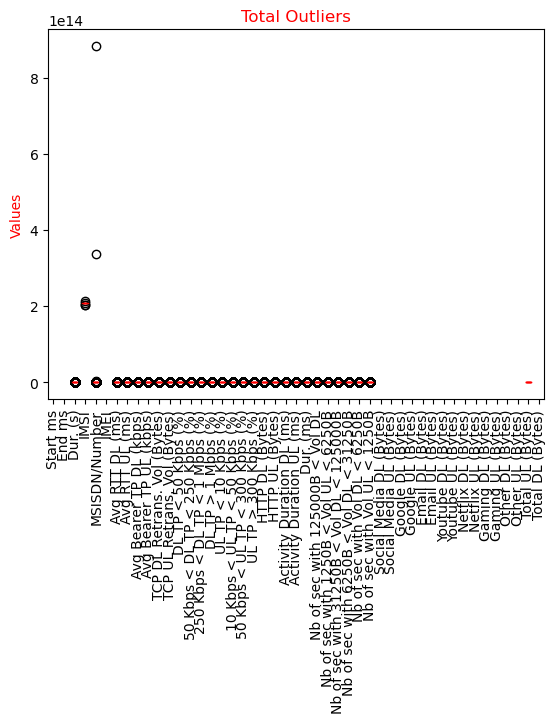

In [19]:
plt.figure(figsize = (12,3), dpi = 200)
outliers.plot(kind = 'box', color = 'red')
plt.xticks(rotation = 90)
plt.title('Total Outliers', color = 'red')
plt.ylabel('Values', color = 'red')
plt.show()

Top 10 Handset used by the customers are:-

In [20]:
df['Handset Type']

0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
150000               Huawei B528S-23A
Name: Handset Type, Length: 150001, dtype: object

Replacing 'undefined' by most occuring word in 'Handset Manufacturer' and 'Handset Type' columns

In [21]:
df['Handset Manufacturer'] = df['Handset Manufacturer'].replace('undefined', df['Handset Manufacturer'].mode().iloc[0])

In [22]:
df['Handset Type'] = df['Handset Type'].replace('undefined', df['Handset Type'].mode().iloc[0])

In [23]:
top_10_handsets = df['Handset Type'].value_counts()[:10]

In [24]:
top_10_handsets

Handset Type
Huawei B528S-23A                29311
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: count, dtype: int64

Text(0.5, 1.0, 'PieChart for Top 10 Handsets used by the customers')

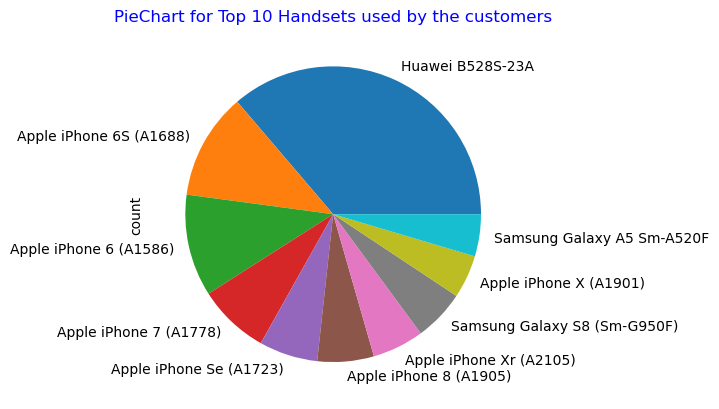

In [25]:
top_10_handsets.plot(kind = 'pie')
plt.title('PieChart for Top 10 Handsets used by the customers', color = 'blue')

Top 3 handset manufacturers

In [26]:
top_3_handset_manufacturers = df['Handset Manufacturer'].value_counts()[:3]

In [27]:
top_3_handset_manufacturers

Handset Manufacturer
Apple      69124
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Text(0.5, 1.0, 'Line Chart for top 3 Handset Manufacturers')

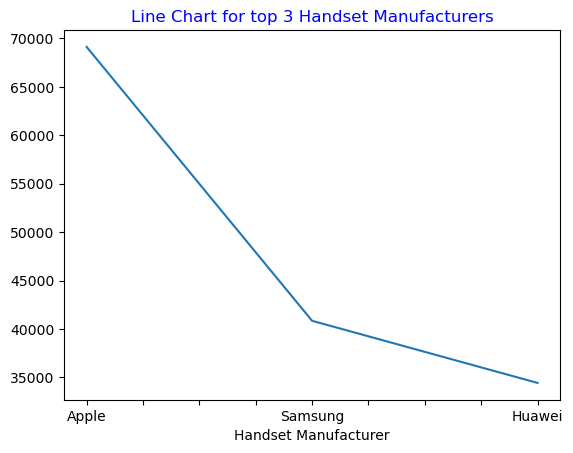

In [28]:
top_3_handset_manufacturers.plot(kind='line')
plt.title('Line Chart for top 3 Handset Manufacturers', color= 'blue')

Top 5 handsets per top 3 handset manufacturers

In [29]:
manufacturer_handset_count = df.groupby(['Handset Manufacturer', 'Handset Type']).size().reset_index(name = 'counts')
top_manufacturers = manufacturer_handset_count.groupby('Handset Manufacturer')['counts'].sum().nlargest(3).index
filtered_df = manufacturer_handset_count[manufacturer_handset_count['Handset Manufacturer'].isin(top_manufacturers)]
top_handsets_per_manufacturer = (filtered_df.sort_values(by = ['Handset Manufacturer', 'counts'], ascending=False).groupby('Handset Manufacturer').head(5))
print(top_handsets_per_manufacturer)

    Handset Manufacturer                    Handset Type  counts
958              Samsung    Samsung Galaxy S8 (Sm-G950F)    4520
841              Samsung      Samsung Galaxy A5 Sm-A520F    3724
891              Samsung     Samsung Galaxy J5 (Sm-J530)    3696
883              Samsung     Samsung Galaxy J3 (Sm-J330)    3484
956              Samsung    Samsung Galaxy S7 (Sm-G930X)    3199
317               Huawei                Huawei B528S-23A   19752
338               Huawei                    Huawei E5180    2079
417               Huawei  Huawei P20 Lite Huawei Nova 3E    2021
416               Huawei                      Huawei P20    1480
458               Huawei                  Huawei Y6 2018     997
95                 Apple                Huawei B528S-23A    9559
60                 Apple         Apple iPhone 6S (A1688)    9419
56                 Apple          Apple iPhone 6 (A1586)    9023
66                 Apple          Apple iPhone 7 (A1778)    6326
80                 Apple 

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

Text(0.5, 1.0, 'Jointplot for top 5 handsets per top 3 handset manufacturers')

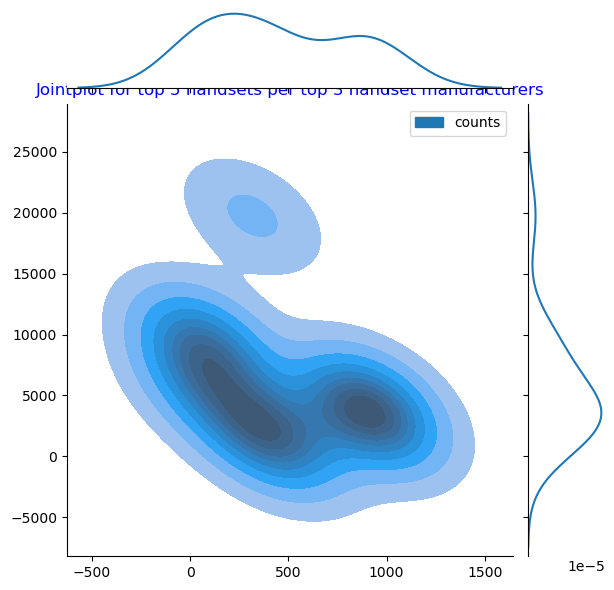

In [30]:
sns.jointplot(top_handsets_per_manufacturer, kind = 'kde', shade = True)
plt.title('Jointplot for top 5 handsets per top 3 handset manufacturers', color = 'blue')

Interpretation and Recommendation to marketing teams

APPLE IS THE MOST USED HANDSET FOLLOWED BY SAMSUNG AND HUAWEI. MARKETING TEAMS SHOULD FOCUS ON MANUFACTURING APPLE HANDSETS AND THEN SAMSUNG

Task 1.1

Aggregate per user the following information in the column:


Here MSISDN/Number will be considered as User/Customer

In [31]:
df = df.sort_values(by = 'MSISDN/Number')

In [32]:
agg_df = pd.DataFrame()


.. number of xDR sessions

In [33]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Actual Start Time'] = df['Start'] + pd.to_timedelta(df['Start ms'], unit = 'ms')
df['Actual End Time'] = df['End'] + pd.to_timedelta(df['End ms'], unit = 'ms')

df['Actual Duration'] = df['Dur. (ms)']/1000

aggregated_df = df.groupby('Bearer Id').size().reset_index(name = 'Number of xDR sessions')
aggregated_df

,Bearer Id,Number of xDR sessions
0,6917537518543529984,1
1,6917537604825860096,1
2,6917537608536819712,1
3,6917537633966310400,1
4,6917537638622189568,1
...,...,...
134704,13186541164985800704,1
134705,13186541166737199104,1
134706,13186541166776899584,1
134707,13186541167134199808,1


In [34]:
df['xDR sessions'] = aggregated_df['Number of xDR sessions']

In [35]:
agg_df['Number of xDR sessions'] = df.groupby('Bearer Id')['xDR sessions'].count()
agg_df['Session duration'] = df.groupby('Bearer Id')['Dur. (s)'].sum()
agg_df['Total DL'] = df.groupby('Bearer Id')['Total DL (Bytes)'].sum()
agg_df['Total UL'] = df.groupby('Bearer Id')['Total UL (Bytes)'].sum()

In [36]:
agg_df['Total Socialmedia DL'] = df.groupby('Bearer Id')['Social Media DL (Bytes)'].sum()
agg_df['Total Socialmedia UL'] = df.groupby('Bearer Id')['Social Media UL (Bytes)'].sum()
agg_df['Total Google DL'] = df.groupby('Bearer Id')['Google DL (Bytes)'].sum()
agg_df['Total Google UL'] = df.groupby('Bearer Id')['Google UL (Bytes)'].sum()
agg_df['Total Email DL'] = df.groupby('Bearer Id')['Email DL (Bytes)'].sum()
agg_df['Total Email UL'] = df.groupby('Bearer Id')['Email UL (Bytes)'].sum()
agg_df['Total Youtube DL'] = df.groupby('Bearer Id')['Youtube DL (Bytes)'].sum()
agg_df['Total Youtube UL'] = df.groupby('Bearer Id')['Youtube UL (Bytes)'].sum()
agg_df['Total Netflix DL'] = df.groupby('Bearer Id')['Netflix DL (Bytes)'].sum()
agg_df['Total Netflix UL'] = df.groupby('Bearer Id')['Netflix UL (Bytes)'].sum()
agg_df['Total Gaming DL'] = df.groupby('Bearer Id')['Gaming DL (Bytes)'].sum()
agg_df['Total Gaming UL'] = df.groupby('Bearer Id')['Gaming UL (Bytes)'].sum()
agg_df['Total Other DL'] = df.groupby('Bearer Id')['Other DL (Bytes)'].sum()
agg_df['Total Other UL'] = df.groupby('Bearer Id')['Other UL (Bytes)'].sum()


In [37]:
agg_df.reset_index(inplace= True)
agg_df

,Bearer Id,Number of xDR sessions,Session duration,Total DL,Total UL,Total Socialmedia DL,Total Socialmedia UL,Total Google DL,Total Google UL,Total Email DL,Total Email UL,Total Youtube DL,Total Youtube UL,Total Netflix DL,Total Netflix UL,Total Gaming DL,Total Gaming UL,Total Other DL,Total Other UL
0,6917537518543529984,1,2.453400e+04,5.007220e+08,4.170461e+07,2.404741e+06,2.410000e+03,5.791591e+06,2.871336e+06,7.823880e+05,8.069200e+05,6.139644e+06,2.071526e+06,1.949428e+07,1.466835e+07,4.661094e+08,5.333340e+06,6.707510e+08,1.595072e+07
1,6917537604825860096,1,2.148900e+04,7.095493e+08,3.869360e+07,2.478607e+06,1.193600e+04,3.605446e+06,2.825198e+06,4.463760e+05,5.251080e+05,1.028122e+07,1.811998e+07,1.945505e+07,1.063165e+07,6.732826e+08,2.670856e+06,5.016085e+08,3.908870e+06
2,6917537608536819712,1,2.778600e+04,8.544659e+08,1.554893e+07,9.446120e+05,2.827000e+03,1.037316e+07,5.639200e+04,1.280030e+05,3.403800e+04,5.385159e+06,4.295851e+06,1.575584e+07,1.300571e+06,8.218791e+08,8.521398e+06,4.728469e+08,1.337849e+06
3,6917537633966310400,1,1.563500e+04,8.257865e+08,4.960569e+07,1.817239e+06,1.982700e+04,2.699880e+05,3.696393e+06,3.191192e+06,8.966700e+05,1.234702e+07,1.108953e+07,2.859358e+06,1.738176e+06,8.053017e+08,1.625748e+07,2.430380e+07,1.590761e+07
4,6917537638622189568,1,2.426400e+04,6.249578e+08,2.198346e+07,1.867318e+06,1.892800e+04,1.689296e+06,1.952160e+05,7.406330e+05,5.900430e+05,1.523182e+07,8.401567e+06,2.156398e+07,2.817981e+06,5.838647e+08,6.992868e+06,6.851222e+08,2.966860e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134704,13186541164985800704,1,1.452910e+05,3.870016e+08,3.618959e+07,3.062671e+06,4.895300e+04,9.363661e+06,4.001970e+06,2.192057e+06,8.663730e+05,2.214792e+07,2.152449e+06,2.146852e+07,8.603105e+06,3.287668e+08,7.569327e+06,3.712613e+08,1.294741e+07
134705,13186541166737199104,0,8.639900e+04,8.726888e+08,3.591946e+07,7.209960e+05,4.283600e+04,1.541915e+06,2.100839e+06,2.315638e+06,8.397890e+05,1.187906e+07,1.290963e+06,2.259693e+07,1.194345e+07,8.336343e+08,1.060717e+07,6.972603e+08,9.094407e+06
134706,13186541166776899584,0,8.639900e+04,3.863551e+08,4.087768e+07,2.492460e+06,3.990500e+04,1.131819e+07,4.662180e+05,2.612190e+06,6.186290e+05,2.216380e+07,1.676344e+07,9.522397e+06,8.346624e+06,3.382460e+08,1.845068e+06,1.738549e+07,1.279780e+07
134707,13186541167134199808,0,1.031130e+05,3.272128e+08,4.614756e+07,1.314234e+06,2.793800e+04,6.969652e+06,3.756009e+06,3.317462e+06,4.082570e+05,1.209932e+07,1.636122e+06,9.992219e+06,1.762489e+07,2.935200e+08,1.629559e+07,4.402905e+08,6.398758e+06


Text(0.5, 1.0, 'Histogram for aggregate columns per user')

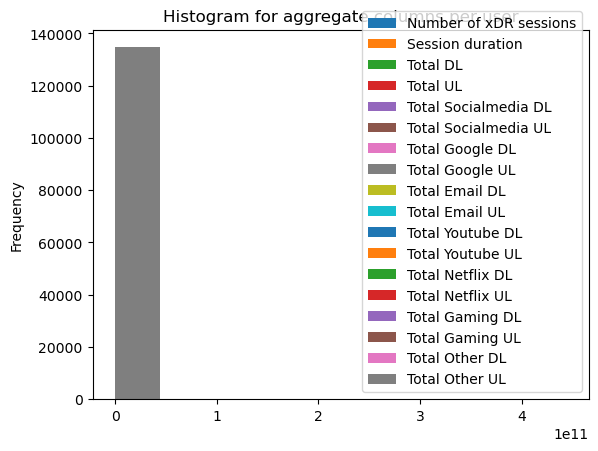

In [38]:
agg_df.plot(kind='hist')
plt.title('Histogram for aggregate columns per user')

These are Aggregate per user XDR SESSIONS, SESSION DURATION, TOTAL DOWNLOAD AND UPLOAD DATA, TOTAL DATA VOLUME FOR EACH APPLICATION

In [39]:
df['xDR sessions'].sum()

150001.0

.. Session duration

In [40]:
df['Dur. (s)'].sum()

15691388660.560347

.. Total download and total upload data

In [41]:
print('Total download data is {}'.format(df['Total DL (Bytes)'].sum()))

Total download data is 68196969155275.08


In [42]:
print('Total upload data is {}'.format (df['Total UL (Bytes)'].sum()))

Total upload data is 6168222065022.292


Total data volume during this session for each application

In [43]:
print('Total Social media download data is {}'.format (df['Social Media DL (Bytes)'].sum()))
print('Total Social media upload data is {}'.format (df['Social Media UL (Bytes)'].sum()))
print('Total Google download data is {}'.format (df['Google DL (Bytes)'].sum()))
print('Total Google upload data is {}'.format (df['Google UL (Bytes)'].sum()))
print('Total Email download data is {}'.format (df['Email DL (Bytes)'].sum()))
print('Total Email upload data is {}'.format (df['Email UL (Bytes)'].sum()))
print('Total Youtube download data is {}'.format (df['Youtube DL (Bytes)'].sum()))
print('Total Youtube upload data is {}'.format (df['Youtube UL (Bytes)'].sum()))
print('Total Netflix download data is {}'.format (df['Netflix DL (Bytes)'].sum()))
print('Total Netflix upload data is {}'.format (df['Netflix UL (Bytes)'].sum()))
print('Total Gaming download data is {}'.format (df['Gaming DL (Bytes)'].sum()))
print('Total Gaming upload data is {}'.format (df['Gaming UL (Bytes)'].sum()))
print('Total Other application download data is {}'.format (df['Other DL (Bytes)'].sum()))
print('Total Other application upload data is {}'.format (df['Other UL (Bytes)'].sum()))

Total Social media download data is 269300061368.77365
Total Social media upload data is 4939298085.43438
Total Google download data is 862618643645.6193
Total Google upload data is 308483345484.9263
Total Email download data is 268761121931.868
Total Email upload data is 70106483664.44194
Total Youtube download data is 1745122509657.504
Total Youtube upload data is 1651422529615.1348
Total Netflix download data is 1744039384662.7188
Total Netflix upload data is 1650274224700.8196
Total Gaming download data is 63307127434008.59
Total Gaming upload data is 1243268005008.1108
Total Other application download data is 63165502729718.195
Total Other application upload data is 1239728178463.4243


Task 1.2

.. Describe all relevant variables and associated datatypes

In [44]:
associated_datatypes = df.info()
associated_datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 150001 entries, 41943 to 125037
Data columns (total 57 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150001 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150001 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (s)                                  150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location Na

Datetime represents a specific point in time. 2 objects are datetime in this dataset
Float represents numbers with decimal points. 47 columns are float in this dataset
Object represents sequence of characters, typically used for text. 4 columns are object in this dataset

.. Basic metrics and their importance for the global objective

In [45]:
basic_metrics = df.describe()
basic_metrics

,Start,Start ms,End,End ms,Dur. (s),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Actual Start Time,Actual End Time,Actual Duration,xDR sessions
count,150001,150001.000000,150001,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001,150001,1.500010e+05,134709.000000
mean,2019-04-26 12:36:38.863644416,499.188200,2019-04-27 17:40:08.188452096,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,...,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,2019-04-26 12:36:39.362832384,2019-04-27 17:40:08.687252736,1.046091e+05,1.113519
min,2019-04-04 12:01:18,0.000000,2019-04-24 22:59:58,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,2019-04-04 12:01:18.770000,2019-04-24 22:59:58.902000,7.142988e+03,1.000000
25%,2019-04-25 00:26:01,250.000000,2019-04-26 07:30:12,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,...,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,2019-04-25 00:26:01.552999936,2019-04-26 07:30:12.919000064,5.744206e+04,1.000000
50%,2019-04-26 08:51:24.500000,499.000000,2019-04-27 23:02:05,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,...,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,2019-04-26 08:51:24.999188224,2019-04-27 23:02:05.498800896,8.639998e+04,1.000000
75%,2019-04-27 18:18:58,749.000000,2019-04-29 07:15:07,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,...,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08,2019-04-27 18:18:58.892000,2019-04-29 07:15:07.884999936,1.324307e+05,1.000000
max,2019-04-29 07:28:43,999.000000,2019-04-30 23:59:27,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,2019-04-29 07:28:43.696000,2019-04-30 23:59:27.041000,1.859336e+06,991.000000
std,NaN,288.610872,NaN,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,...,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,NaN,NaN,8.103734e+04,2.724426


Text(0.5, 1.0, 'AreaPlot for Basic Metrics')

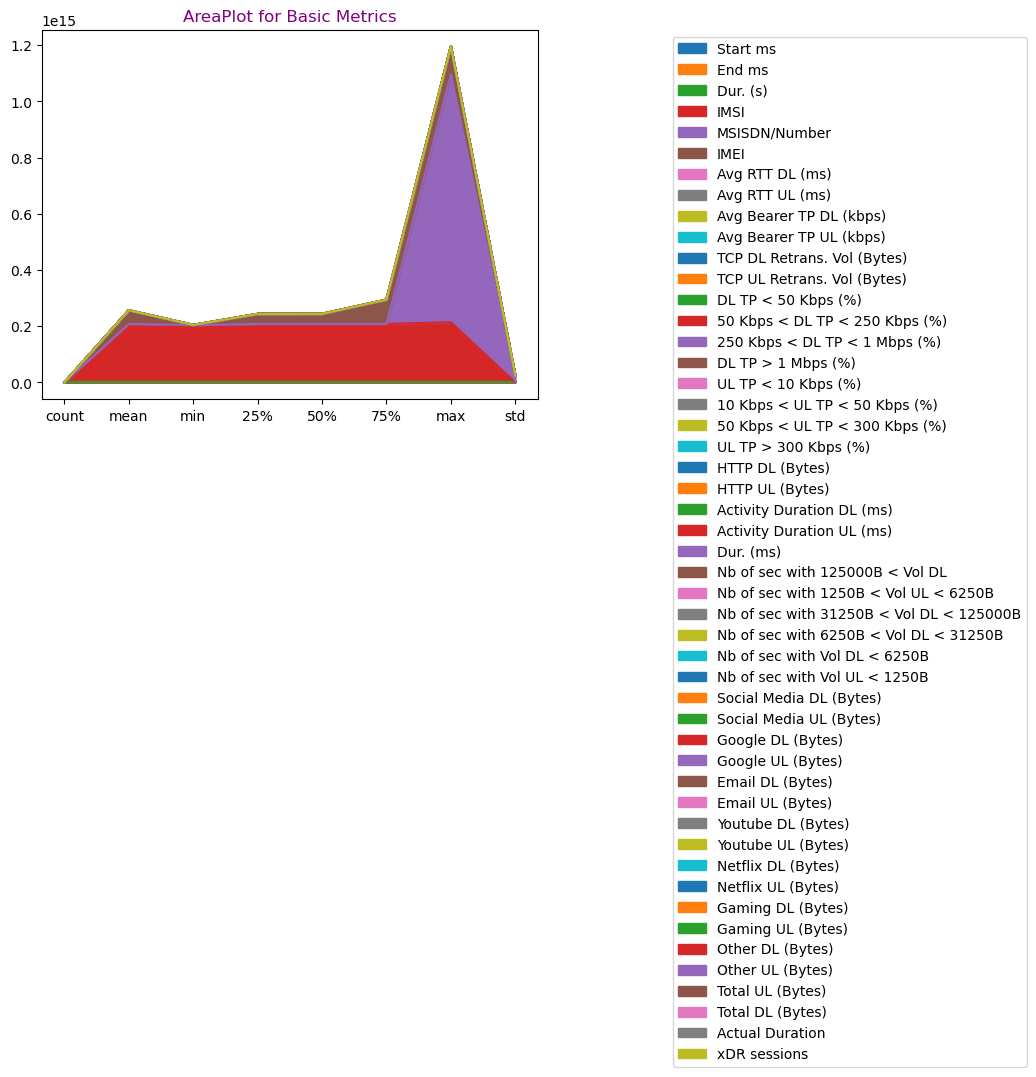

In [46]:
basic_metrics.plot(kind='area')
plt.legend(bbox_to_anchor=(2,1), loc='upper right')
plt.title('AreaPlot for Basic Metrics', color = 'purple')

we have calculated count(Total number of columns), mean(average), median(50%), minimum, maximum and standard deviation of all the numerical columns.

○	 Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and providing useful interpretation

Dispersion parameters are:-
1. Range
2. Variance
3. Standard Deviation
4. Interquartile range

1. Range = Max - min

In [47]:
range = df[numerical_columns].max() - df[numerical_columns].min()

In [48]:
range

Start ms                                    9.990000e+02
End ms                                      9.990000e+02
Dur. (s)                                    1.852194e+06
IMSI                                        1.002719e+13
MSISDN/Number                               8.823635e+14
IMEI                                        9.856119e+13
Avg RTT DL (ms)                             9.692300e+04
Avg RTT UL (ms)                             7.120000e+03
Avg Bearer TP DL (kbps)                     3.781600e+05
Avg Bearer TP UL (kbps)                     5.861300e+04
TCP DL Retrans. Vol (Bytes)                 4.294426e+09
TCP UL Retrans. Vol (Bytes)                 2.908226e+09
DL TP < 50 Kbps (%)                         1.000000e+02
50 Kbps < DL TP < 250 Kbps (%)              9.300000e+01
250 Kbps < DL TP < 1 Mbps (%)               1.000000e+02
DL TP > 1 Mbps (%)                          9.400000e+01
UL TP < 10 Kbps (%)                         1.000000e+02
10 Kbps < UL TP < 50 Kbps (%)  

2. Variance

In [49]:
variance = df[numerical_columns].var()

In [50]:
variance

Start ms                                    8.329624e+04
End ms                                      8.299970e+04
Dur. (s)                                    6.567052e+09
IMSI                                        4.599834e+20
MSISDN/Number                               5.947410e+24
IMEI                                        5.005776e+26
Avg RTT DL (ms)                             3.128642e+05
Avg RTT UL (ms)                             5.856831e+03
Avg Bearer TP DL (kbps)                     5.746471e+08
Avg Bearer TP UL (kbps)                     2.139377e+07
TCP DL Retrans. Vol (Bytes)                 1.374418e+16
TCP UL Retrans. Vol (Bytes)                 2.488873e+14
DL TP < 50 Kbps (%)                         1.691358e+02
50 Kbps < DL TP < 250 Kbps (%)              3.843494e+01
250 Kbps < DL TP < 1 Mbps (%)               1.721478e+01
DL TP > 1 Mbps (%)                          2.320097e+01
UL TP < 10 Kbps (%)                         2.136320e+01
10 Kbps < UL TP < 50 Kbps (%)  

3. Standard Deviation

In [51]:
standard_deviation = df[numerical_columns].std()

In [52]:
standard_deviation


Start ms                                    2.886109e+02
End ms                                      2.880967e+02
Dur. (s)                                    8.103735e+04
IMSI                                        2.144722e+10
MSISDN/Number                               2.438731e+12
IMEI                                        2.237359e+13
Avg RTT DL (ms)                             5.593426e+02
Avg RTT UL (ms)                             7.652993e+01
Avg Bearer TP DL (kbps)                     2.397180e+04
Avg Bearer TP UL (kbps)                     4.625340e+03
TCP DL Retrans. Vol (Bytes)                 1.172356e+08
TCP UL Retrans. Vol (Bytes)                 1.577616e+07
DL TP < 50 Kbps (%)                         1.300522e+01
50 Kbps < DL TP < 250 Kbps (%)              6.199592e+00
250 Kbps < DL TP < 1 Mbps (%)               4.149070e+00
DL TP > 1 Mbps (%)                          4.816738e+00
UL TP < 10 Kbps (%)                         4.622035e+00
10 Kbps < UL TP < 50 Kbps (%)  

4. Interquartile Range

In [53]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1


In [54]:
IQR

Start ms                                    4.990000e+02
End ms                                      4.990000e+02
Dur. (s)                                    7.498800e+04
IMSI                                        3.703424e+08
MSISDN/Number                               3.322217e+07
IMEI                                        5.065709e+13
Avg RTT DL (ms)                             7.479571e+01
Avg RTT UL (ms)                             1.466288e+01
Avg Bearer TP DL (kbps)                     1.966700e+04
Avg Bearer TP UL (kbps)                     1.073000e+03
TCP DL Retrans. Vol (Bytes)                 1.947698e+07
TCP UL Retrans. Vol (Bytes)                 6.966497e+05
DL TP < 50 Kbps (%)                         9.000000e+00
50 Kbps < DL TP < 250 Kbps (%)              4.000000e+00
250 Kbps < DL TP < 1 Mbps (%)               1.000000e+00
DL TP > 1 Mbps (%)                          1.000000e+00
UL TP < 10 Kbps (%)                         1.000000e+00
10 Kbps < UL TP < 50 Kbps (%)  

○	Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting the findings

We ll plot univariate analysis for each variable

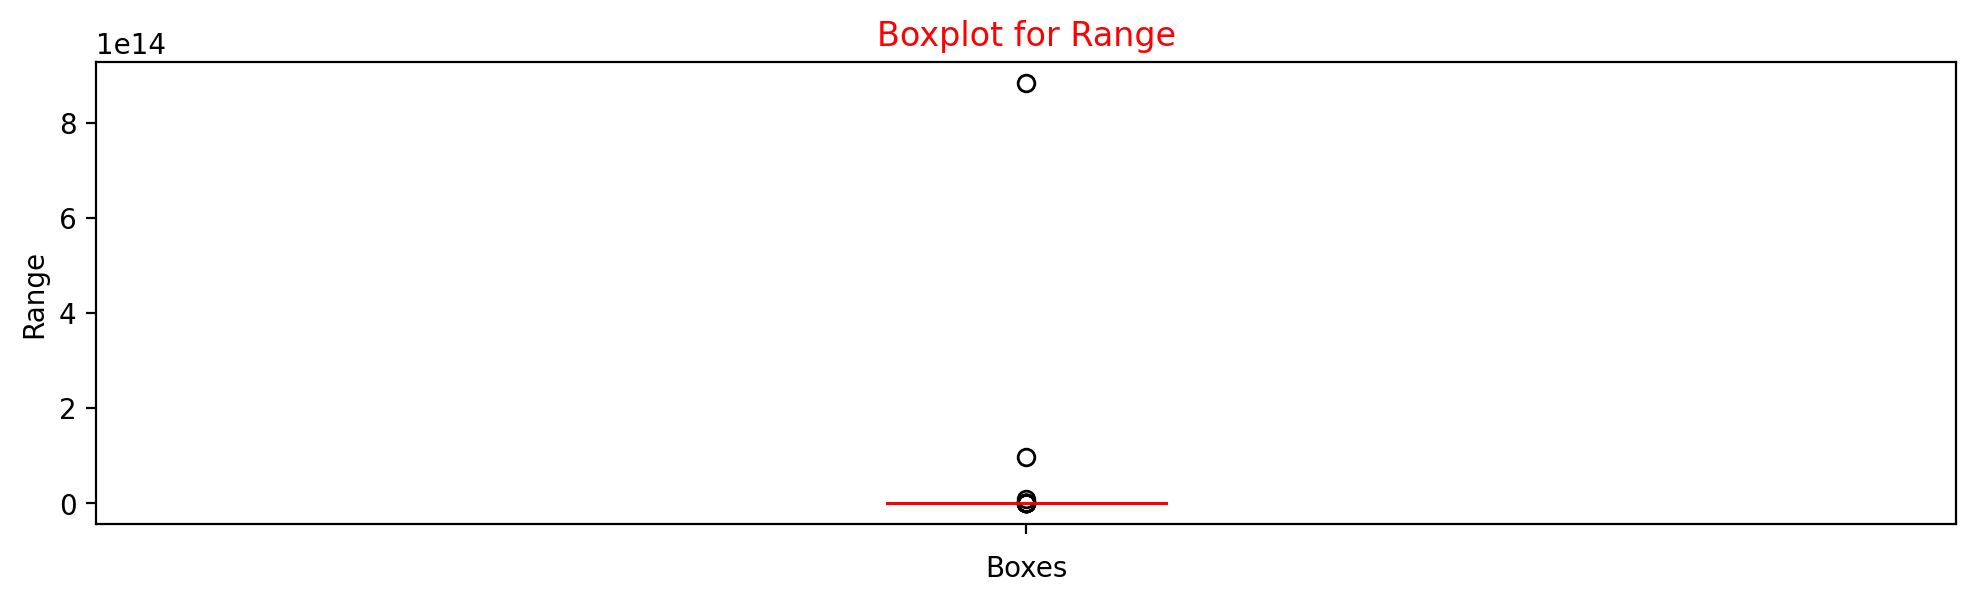

In [55]:
plt.figure(figsize = (12,3), dpi = 200)
range.plot(kind = 'box', color = 'red')
plt.title('Boxplot for Range', color = 'red')
plt.xlabel('Boxes')
plt.ylabel('Range')
plt.show()

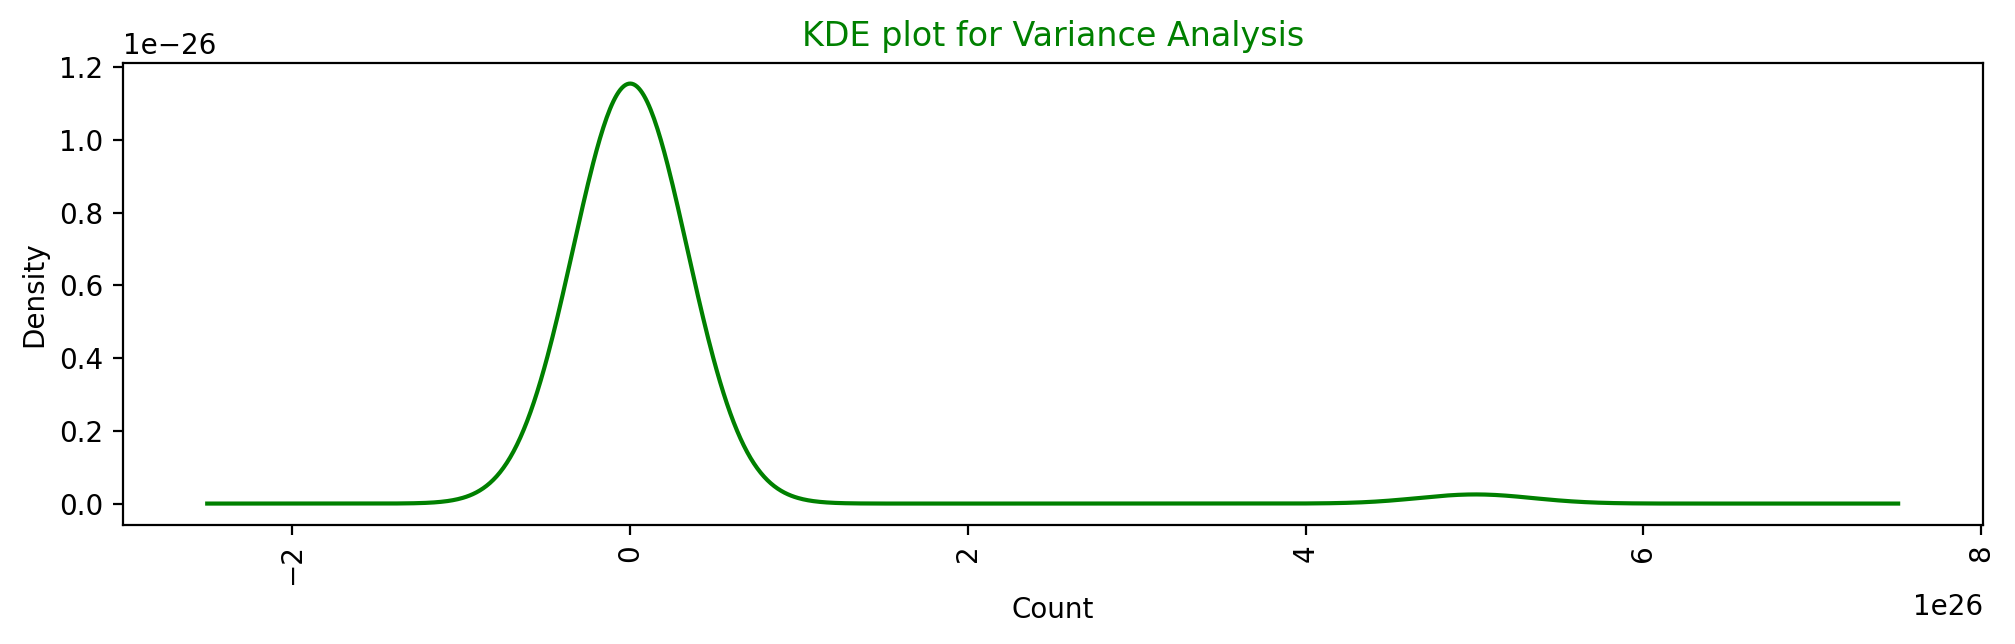

In [56]:
plt.figure(figsize = (12,3), dpi = 200)
variance.plot(kind = 'kde', color = 'green')
plt.xticks(rotation = 90)
plt.title('KDE plot for Variance Analysis', color = 'green')
plt.xlabel('Count')
plt.show()

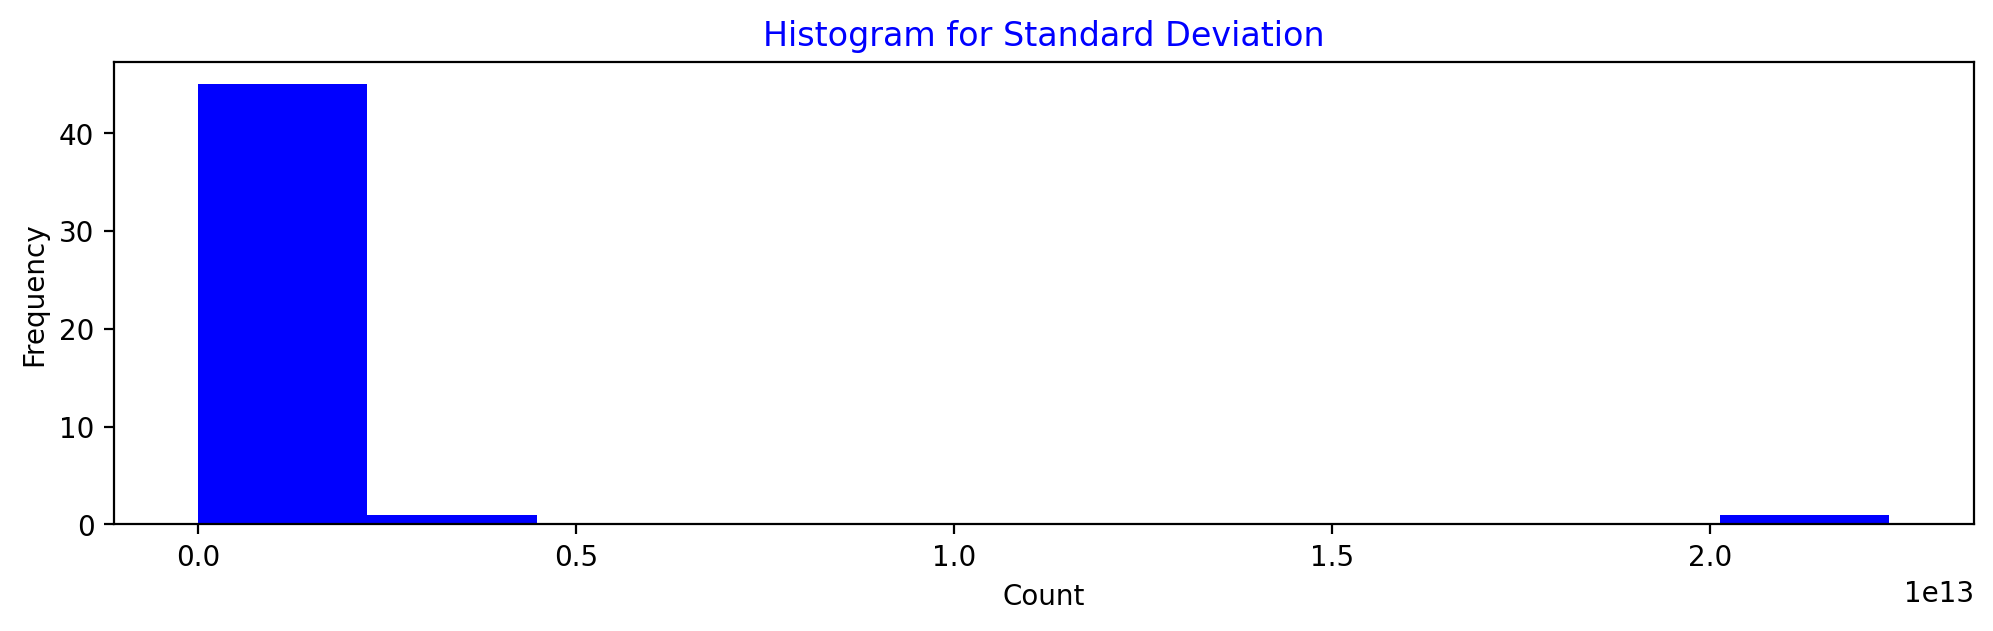

In [57]:
plt.figure(figsize = (12,3), dpi = 200)
standard_deviation.plot(kind = 'hist', color = 'blue')
plt.title('Histogram for Standard Deviation', color = 'blue')
plt.xlabel('Count')
plt.show()

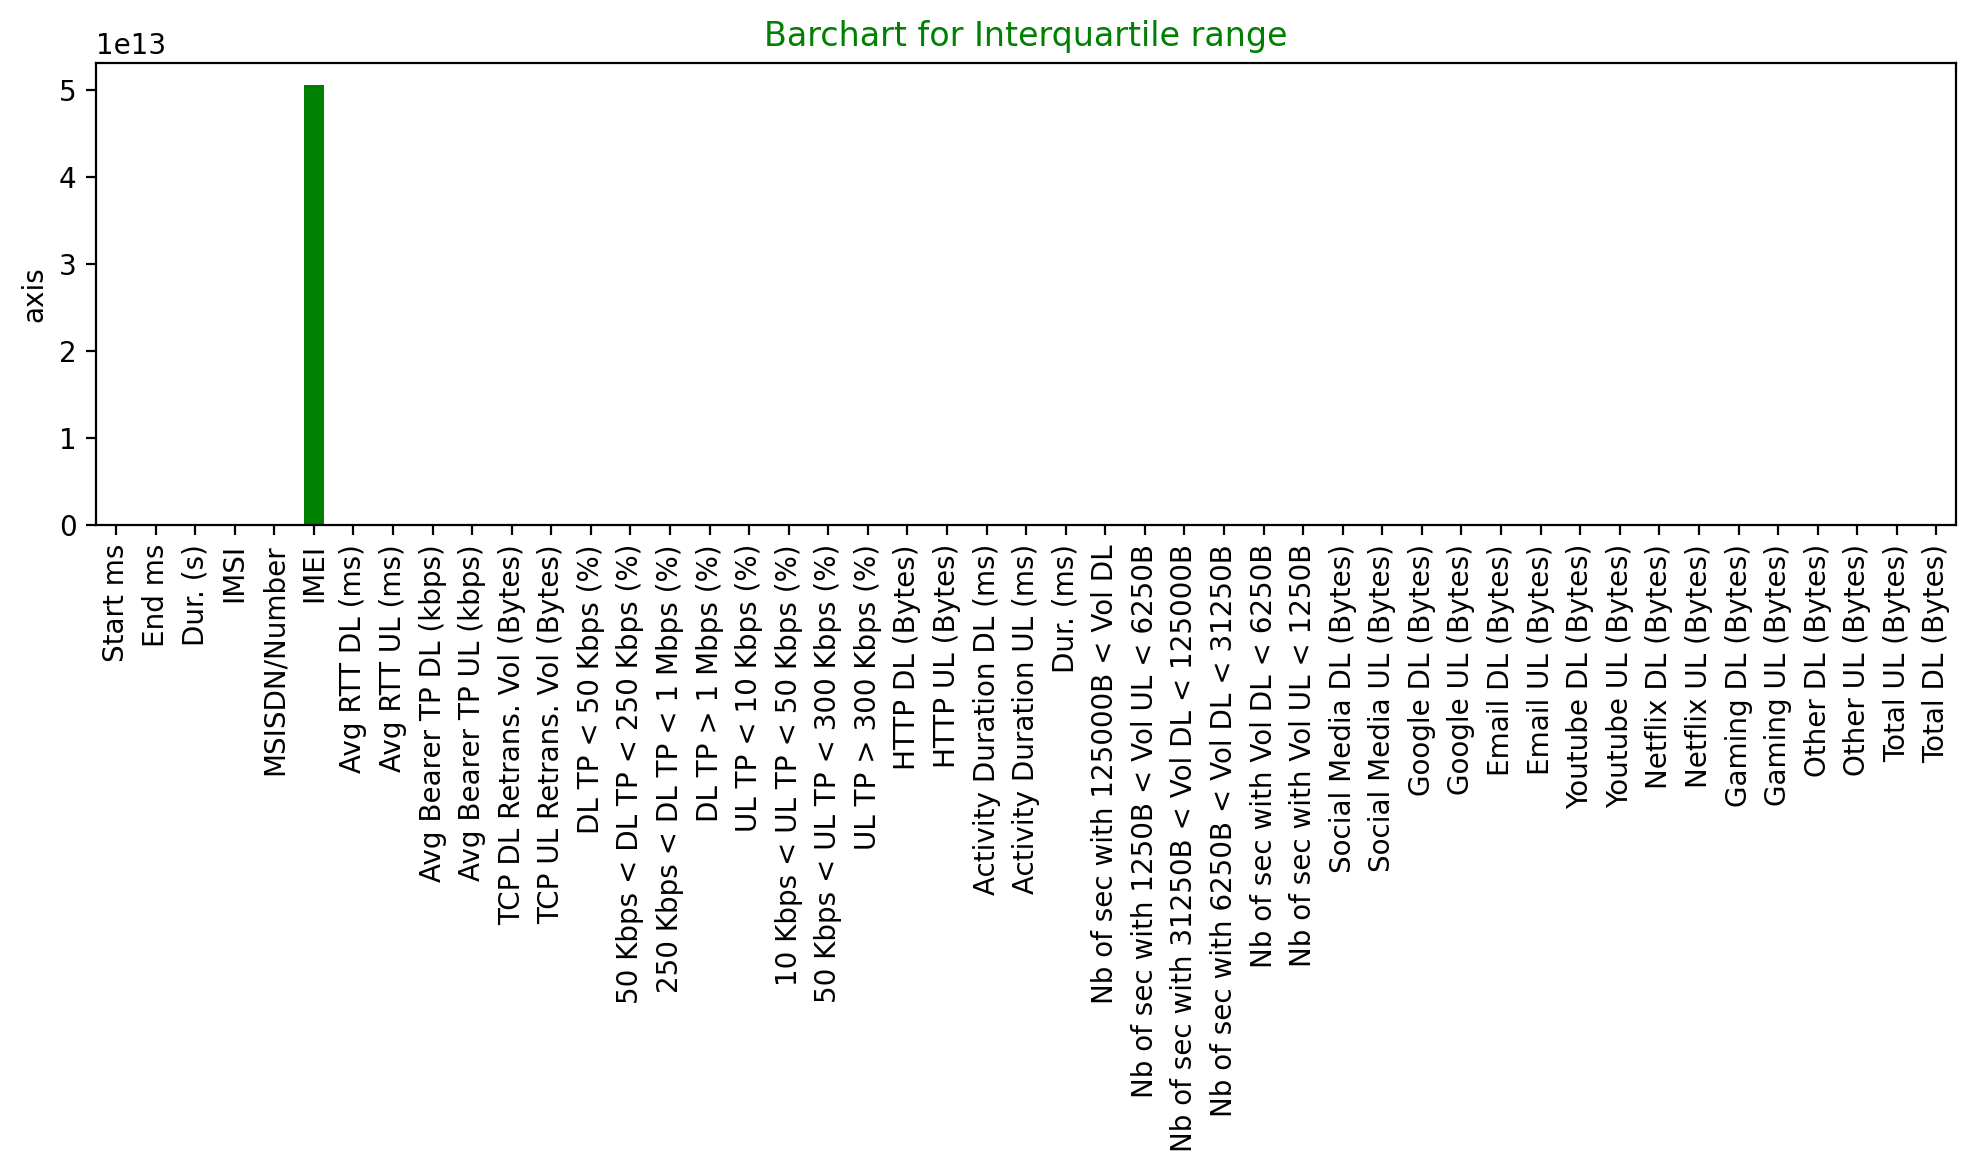

In [58]:
plt.figure(figsize = (12,3), dpi = 200)
IQR.plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 90)
plt.title('Barchart for Interquartile range', color = 'green')
plt.ylabel('axis')
plt.show()

Findings: According to Boxplot, Range lies between 0 to 8..According to KDE plot, Variance focus on 0..Standard Daviation lies between 0 and 0.5 and alse greater than 2 and Interquartile range focuses on IMEI i.e; International Mobile Equipment Identity

○	Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings

Total DL + UL data is:

In [59]:
total_data = df['Total DL (Bytes)'].sum() + df['Total UL (Bytes)'].sum()

In [60]:
total_data

74365191220297.38

1. Relationship of Social media with total data

In [61]:
100*(df['Social Media DL (Bytes)'].sum() + df['Social Media UL (Bytes)'].sum()) / total_data

0.3687738240890271

2. Relationship of Google with total data

In [62]:
100*(df['Google DL (Bytes)'].sum() + df['Google UL (Bytes)'].sum()) / total_data

1.574798598528854

3. Relationship of Email with total data

In [63]:
100*(df['Email DL (Bytes)'].sum() + df['Email UL (Bytes)'].sum()) / total_data

0.45568040643163

4. Relationship of Youtube with total data

In [64]:
100*(df['Youtube DL (Bytes)'].sum() + df['Youtube UL (Bytes)'].sum()) / total_data

4.567385605465343

5. Relationship of Netflix with total data


In [65]:
100*(df['Netflix DL (Bytes)'].sum() + df['Netflix UL (Bytes)'].sum()) / total_data

4.5643849678384045

6. Relationship of Gaming with total data


In [66]:
100*(df['Gaming DL (Bytes)'].sum() + df['Gaming UL (Bytes)'].sum()) / total_data

86.80189532195837

7. Relationship of other applications with total data

In [67]:
100*(df['Other DL (Bytes)'].sum() + df['Other UL (Bytes)'].sum()) / total_data

86.60669037667012

User Total Traffic(data) per application

In [68]:
Total_social_media = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
Total_google = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
Total_email = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
Total_youtube = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
Total_netflix = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
Total_gaming = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
Total_others = df['Other DL (Bytes)'] + df['Other UL (Bytes)'] 

Making them different columns in data

In [69]:
df['Total_social_media'] = Total_social_media
df['Total_google'] = Total_google
df['Total_email'] = Total_email
df['Total_youtube'] = Total_youtube
df['Total_netflix'] = Total_netflix
df['Total_gaming'] = Total_gaming
df['Total_others'] = Total_others

Findings: Gaming is used the most which is 86.8% and after this other applications are used which are 86.6%. Rest Netflix and Youtube are used 4% each and Google is used only 1.5%

c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Niti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

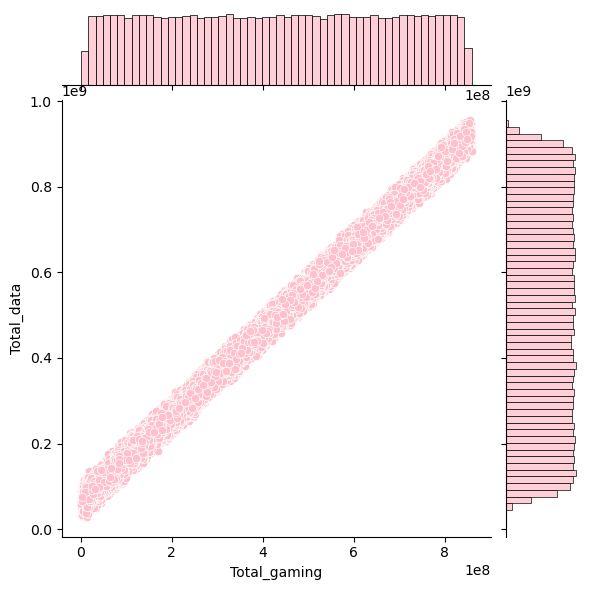

In [75]:
sns.jointplot(data=df, x = 'Total_gaming', y = 'Total_data', color = 'pink')
plt.title('Relationship of most used Application with Total data')
plt.show()

In [ ]:
sns.violinplot(data=df, x='Total_others', y='Total_data')

○	Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [70]:
total_duration_sec = df['Dur. (s)'].value_counts()

In [71]:
total_duration_sec.head(5)

Dur. (s)
86399.0    21413
86400.0     6437
85499.0      188
86398.0      145
86397.0      110
Name: count, dtype: int64

Making a new column in the dataset with the name of 'Total Data'

In [72]:
df['Total_data'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

In [73]:
df['Total_data']

41943     878690574.0
127709    156859643.0
134590    595966483.0
95551     422320698.0
16603     585578364.0
             ...     
64984     538210557.0
65262     579709567.0
100015    232123971.0
126054    596287824.0
125037    139153646.0
Name: Total_data, Length: 150001, dtype: float64

In [74]:
total_duration = df.groupby('Dur. (s)')['Total_data']

In [75]:
total_duration_per_user = df.groupby('Gaming DL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Gaming UL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Other DL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Other UL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Netflix DL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Netflix UL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Youtube DL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Youtube UL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Google DL (Bytes)')['Dur. (s)'].sum().reset_index()
total_duration_per_user = df.groupby('Google UL (Bytes)')['Dur. (s)'].sum().reset_index()

We have segmented the users into top 5 decile classes based on total duration for all sessions

In [76]:
total_duration_per_user['decile_class'] = pd.qcut(total_duration_per_user['Dur. (s)'], q = 10, labels = False, duplicates= 'drop')

In [77]:
result = total_duration_per_user.groupby('decile_class')['Dur. (s)'].sum().reset_index()

In [78]:
print(result)

   decile_class      Dur. (s)
0             0  2.915277e+08
1             1  5.375512e+08
2             2  8.663881e+08
3             3  2.631269e+09
4             4  1.176142e+09
5             5  1.545415e+09
6             6  1.994188e+09
7             7  2.466157e+09
8             8  4.182750e+09


This is the result of total data per decile class

○	Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, YouTube data, Netflix data, Gaming data, and Other data 

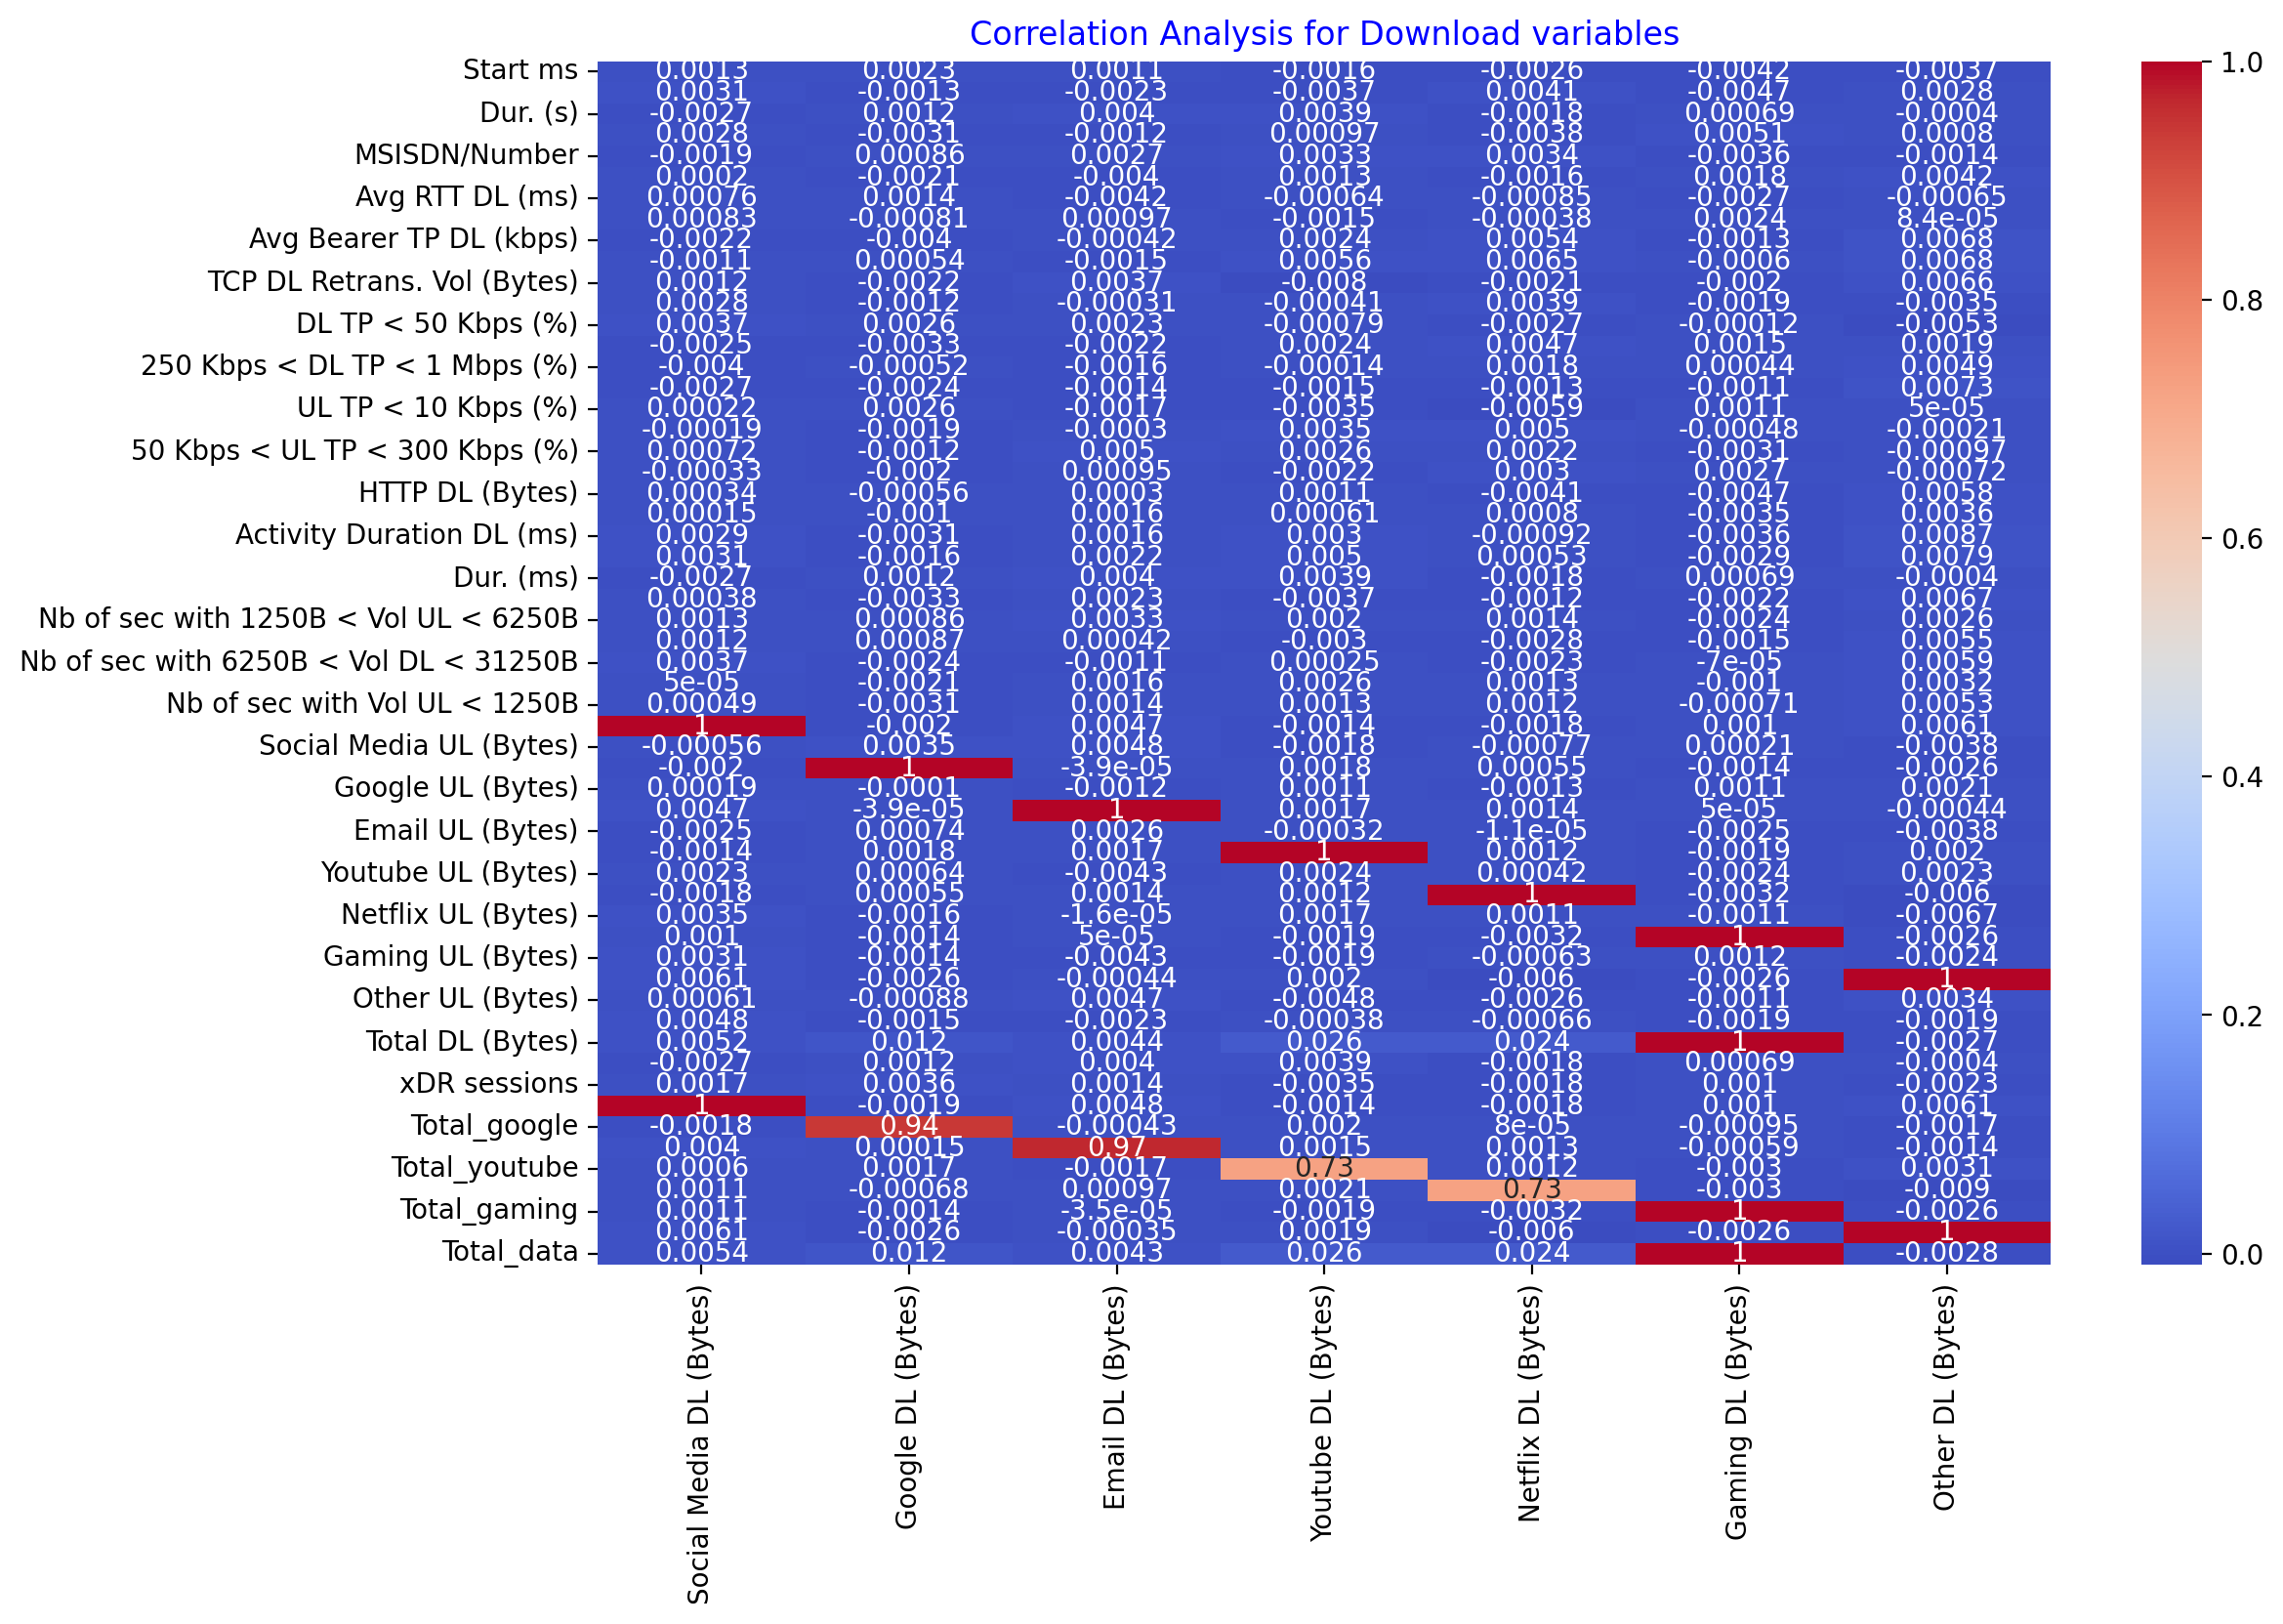

In [79]:
plt.figure(figsize= (12,8), dpi = 200)
sns.heatmap(df.corr(numeric_only= True)[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                                          'Other DL (Bytes)']], annot = True, cmap = 'coolwarm')
plt.title('Correlation Analysis for Download variables', color = 'blue')
plt.show()


All download applications have been taken and their correlation map has been made which shows an average correlation between each application

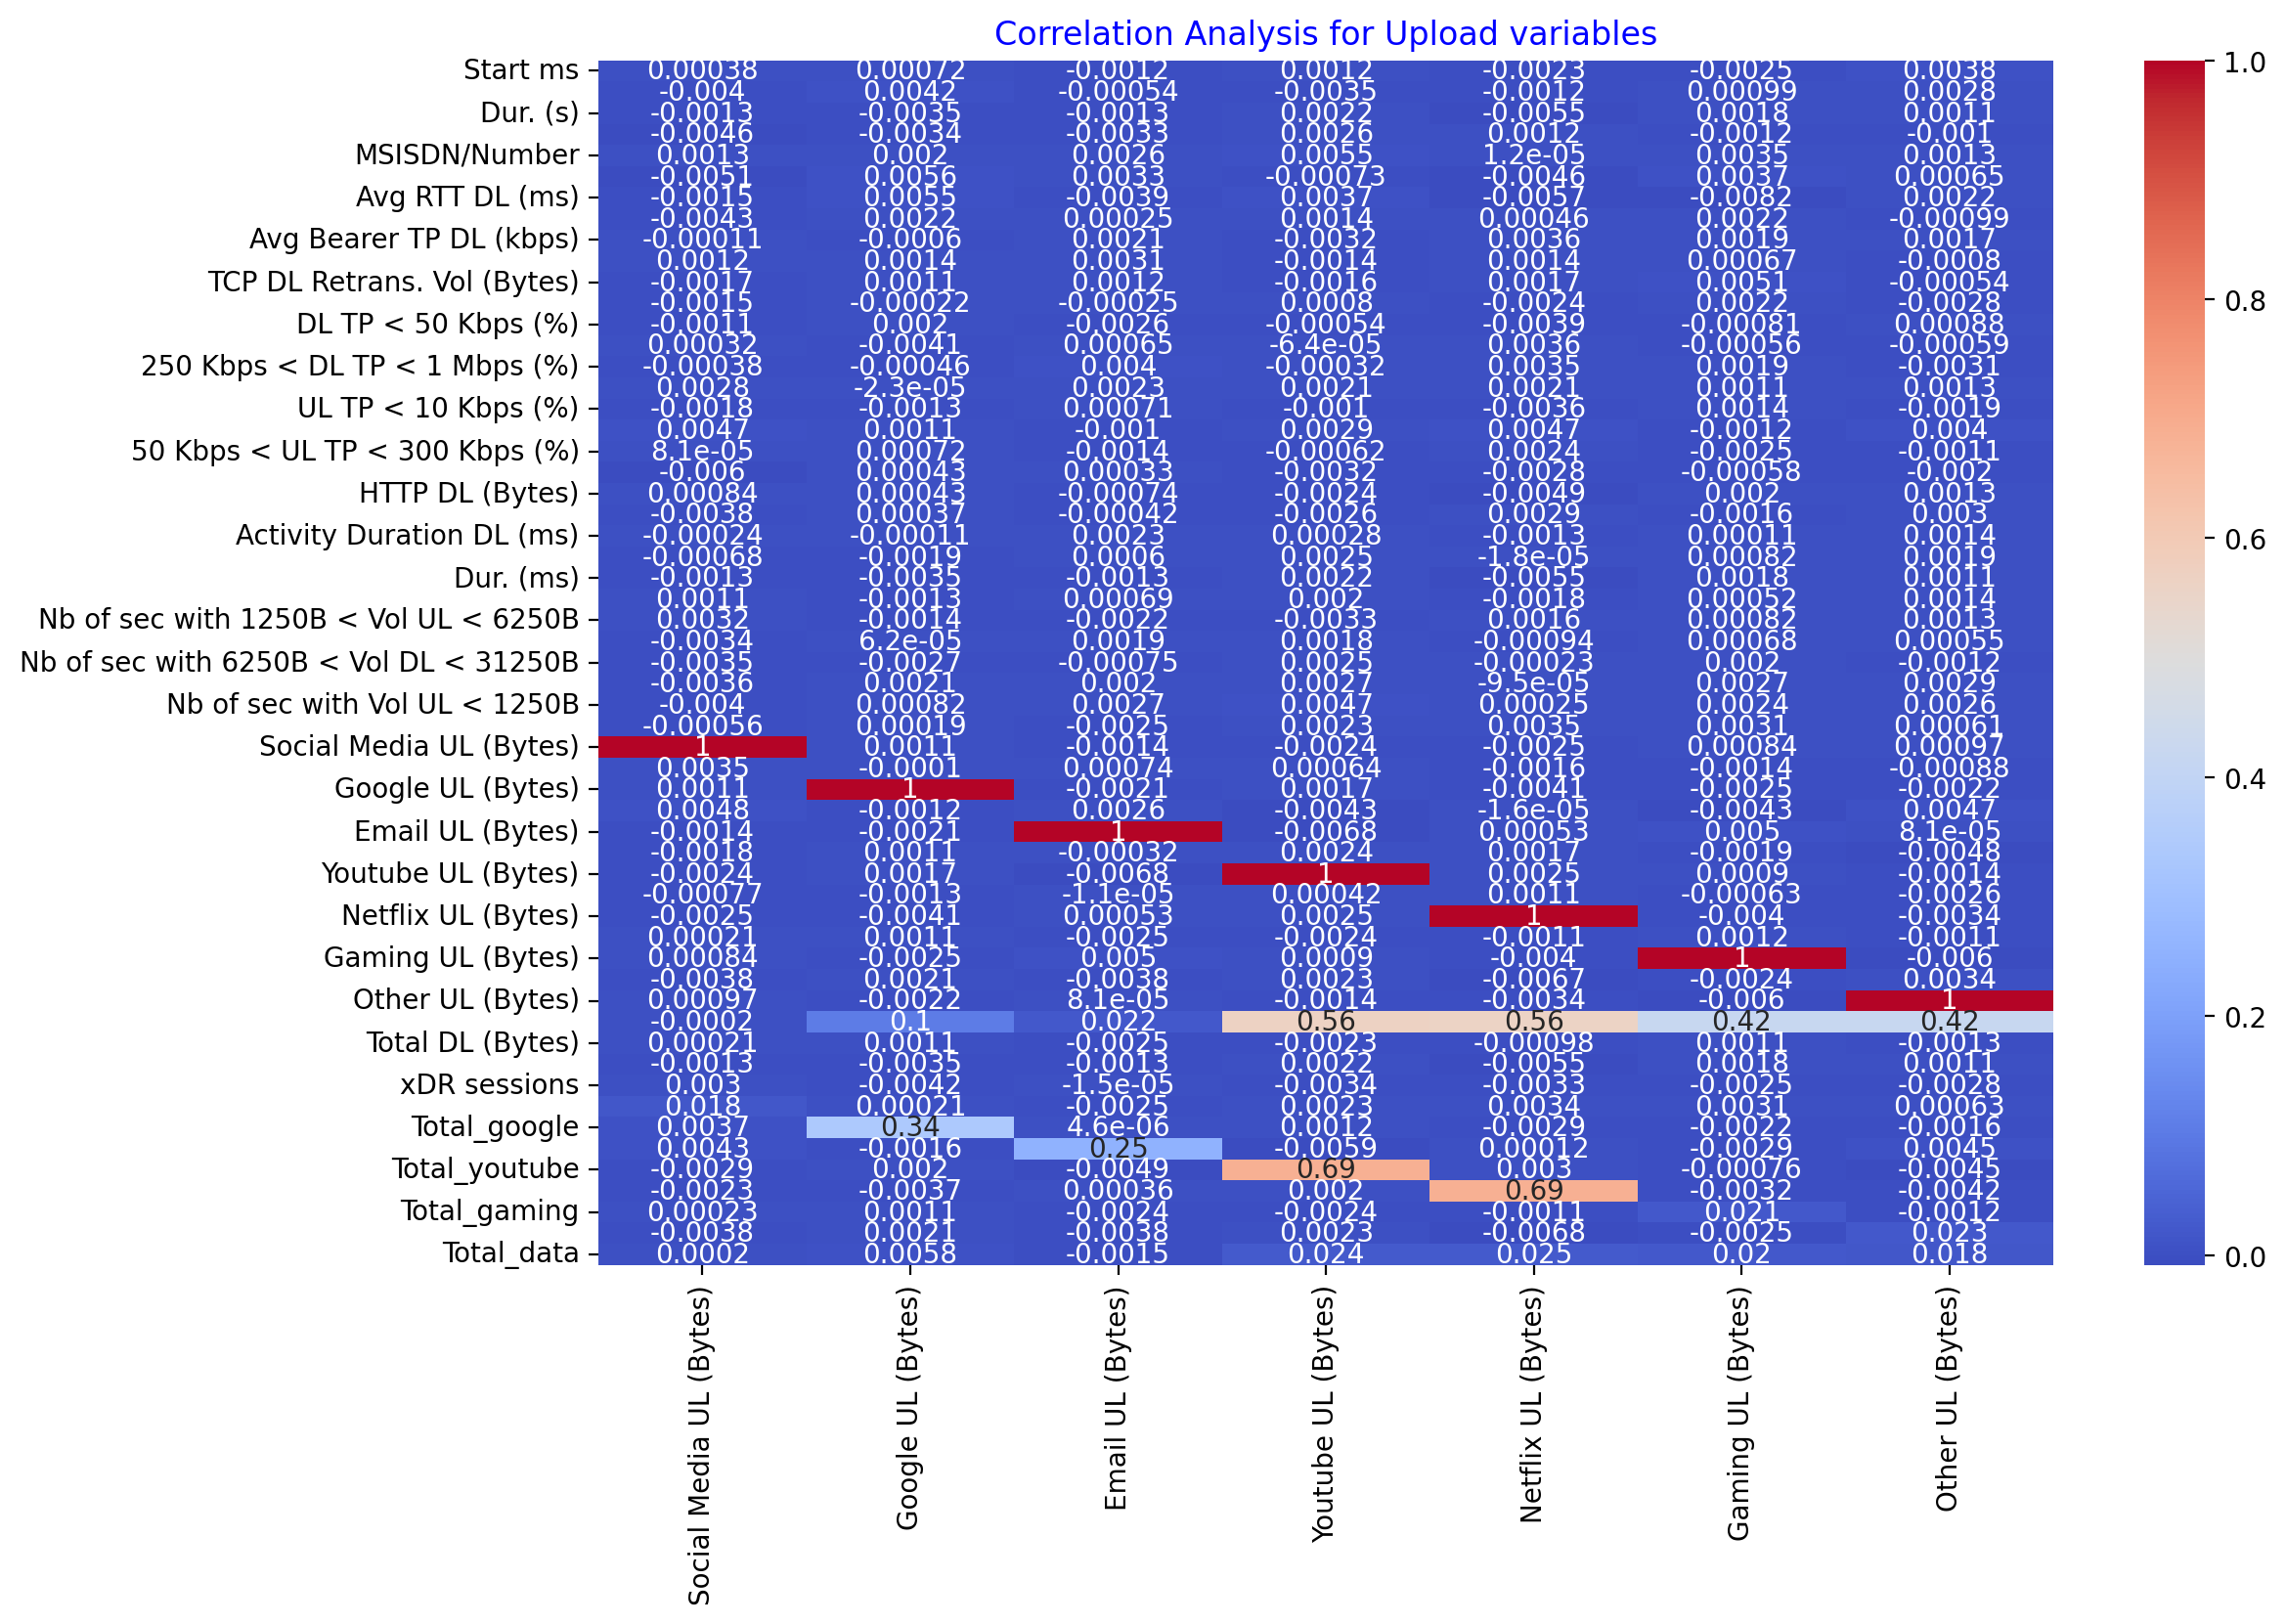

In [80]:
plt.figure(figsize= (12,8), dpi = 200)
sns.heatmap(df.corr(numeric_only= True)[['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)',
                                          'Other UL (Bytes)']], annot = True, cmap = 'coolwarm')
plt.title('Correlation Analysis for Upload variables', color = 'blue')
plt.show()


All upload applications have been taken for their correlation and this correlation is better that the downloaded data. Youtube , Netflix, Gaming and other shows a positive correlation

○	Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
X = df[numerical_columns]
y = df['Total_data']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply PCA for feature extraction
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a regresssor on the extracted features
rfr = RandomForestRegressor()
rfr.fit(X_train_pca, y_train)

# Evaluate the classifier on the test set
accuracy = rfr.score(X_test_pca, y_test)
print(f"Accuracy with PCA components: {accuracy}")


Accuracy with PCA components: 0.9971486582096578


Accuracy comes out to be 99%

We have taken numerical data as Features and Total data (in bytes) as Target

Random Forest Regressor has been used because Target column has continuous variables in which classification algorithm can not be used

By fitting Principle Component Analysis we have reduced the dimensionality of the columns


In [82]:
pca.explained_variance_ratio_

array([9.87202768e-01, 1.27966607e-02, 5.70328794e-07, 7.69393247e-10,
       2.34911529e-10, 1.16747165e-10, 2.71599189e-11, 1.28786822e-11])

In [83]:
pca.explained_variance_ratio_.sum()

0.9999999999982677

Text(0.5, 1.0, 'Correlation Analysis for PCA Components')

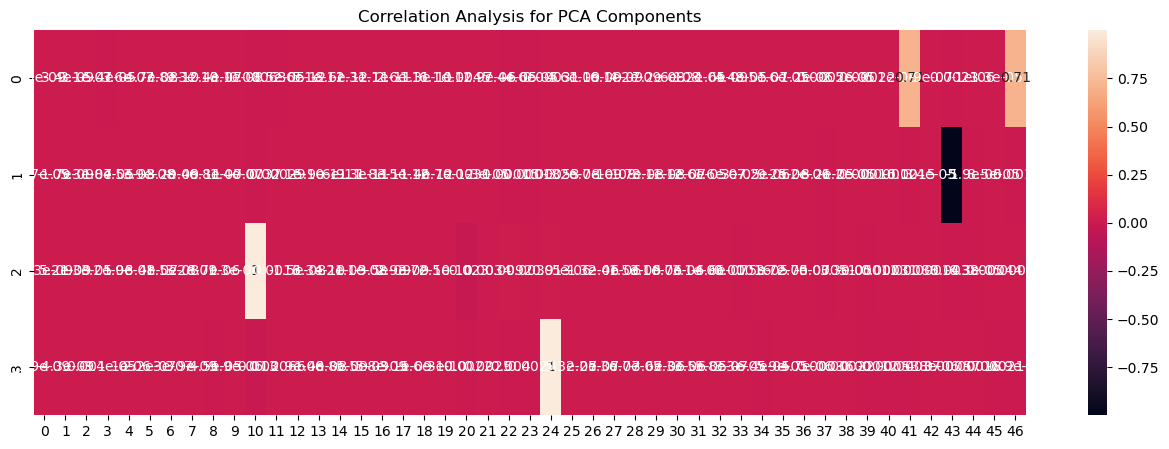

In [84]:
plt.figure(figsize=(16,5), dpi=100)
sns.heatmap(pca.components_[4:8], annot= True)
plt.title('Correlation Analysis for PCA Components')

Saving file for task 2

In [89]:
df.to_excel('Telecom_data for 2nd question.xlsx')